In [3]:
import scipy.stats
import os
import csv
from scipy.special import erf, erfinv
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt
import sat  #From the thinkbayes repository

<IPython.core.display.Javascript object>


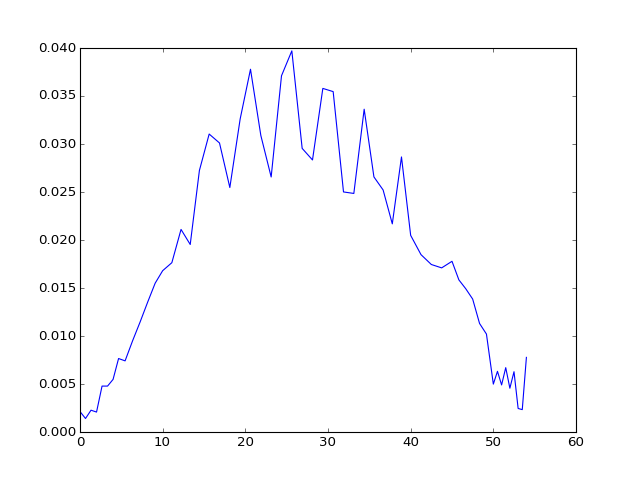

<IPython.core.display.Javascript object>


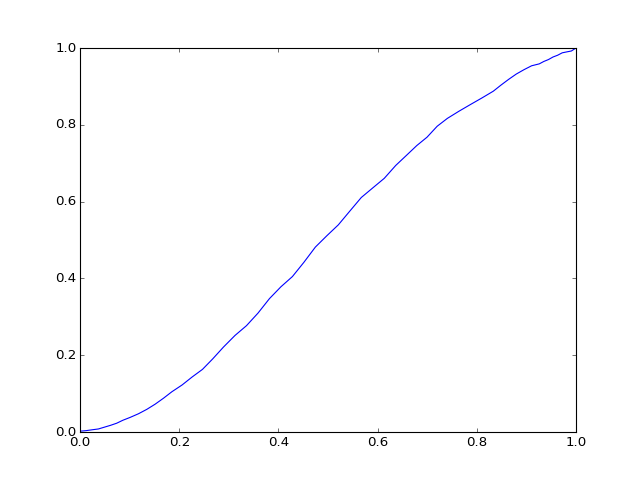

In [4]:
interpolator=sat.ReadScale()
def lookup(datain):
    return np.array([interpolator.Lookup(i) for i in datain])

def reverse(datain):
    return np.array([interpolator.Reverse(i) for i in datain])

x=np.array(sat.ReadRanks(),dtype=np.float64)[:,0]
ind=np.argsort(x)
x=x[ind]

xraw=reverse(x)
xrawall=xraw/54.

prior=np.array(sat.ReadRanks(),dtype=np.float64)[ind,1][xrawall>=0]
prior=prior/prior.sum()



plt.figure()
plt.plot(xraw[xrawall>=0],prior)


xrawall=xrawall[xrawall>=0]
plt.figure()
plt.plot(xrawall,np.cumsum(prior))

<IPython.core.display.Javascript object>


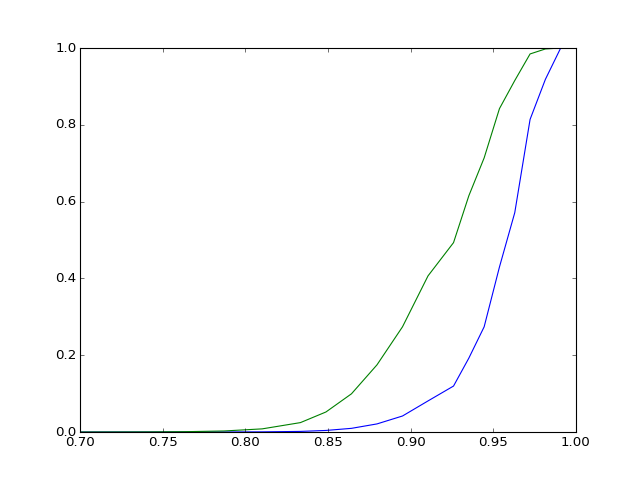

<IPython.core.display.Javascript object>


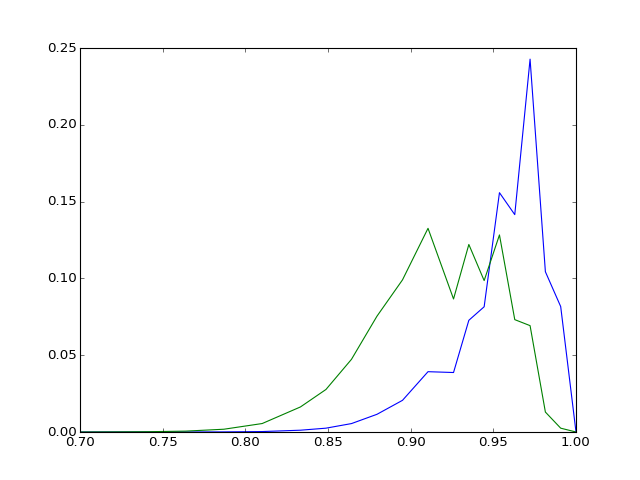

0.754398365446 0.168151875363 0.0774497591908
0.793123245041 0.206876754959
3.83379585203


In [5]:


def likelihood(score,p_correct):
    scoreraw=reverse([score])
    return scipy.stats.binom.pmf(scoreraw,54,p_correct)
posterioralice=prior*likelihood(780,xrawall)
posteriorbob=prior*likelihood(740,xrawall)

posterioralice=posterioralice/posterioralice.sum()
posteriorbob=posteriorbob/posteriorbob.sum()
plt.figure()
plt.plot(xrawall,np.cumsum(posterioralice))
plt.plot(xrawall,np.cumsum(posteriorbob))
plt.xlim(0.7)

plt.figure()
plt.plot(xrawall,posterioralice)
plt.plot(xrawall,posteriorbob)
plt.xlim(0.7)


probA=0
probB=0
probE=0
for i in range(len(xrawall)):
    for j in range(len(xrawall)):
        if xrawall[i]>xrawall[j]:
            probA+=posterioralice[i]*posteriorbob[j]
        elif xrawall[i]<xrawall[j]:
            probB+=posterioralice[i]*posteriorbob[j]
        else:
            probE+=posterioralice[i]*posteriorbob[j]

print probA,probB,probE
print probA+probE/2,probB+probE/2

print (probA+probE/2)/(probB+probE/2)

In [6]:
def ProbCorrect(efficacy, difficulty, a=1):
    return 1 / (1 + np.exp(-a * (efficacy - difficulty)))

<IPython.core.display.Javascript object>


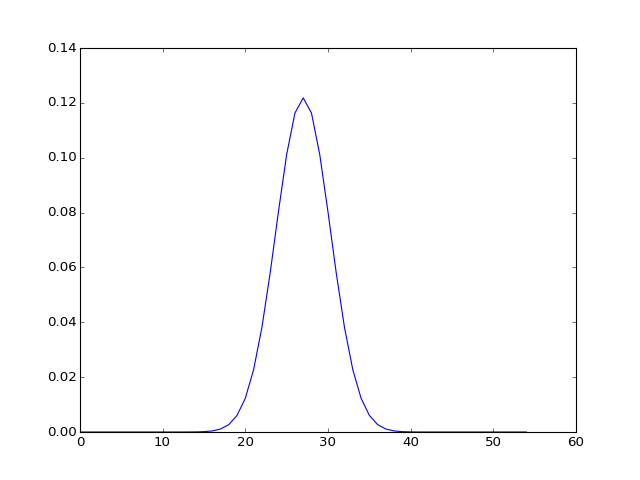

In [7]:
N=54

c=-0.05
w=1.8

difficulties=np.linspace(c-w,c+w,N)
efficacy=c
probs=ProbCorrect(efficacy,difficulties)
results=np.arange(0.,N+1)
probabilities=results*0
probabilities[0]=1
for p in probs:
    probabilitiesaux1=probabilities*(1-p)
    probabilitiesaux2=np.roll(probabilities*p,1)
    probabilities=probabilitiesaux1+probabilitiesaux2
    

plt.figure()
plt.plot(results,probabilities)

<IPython.core.display.Javascript object>


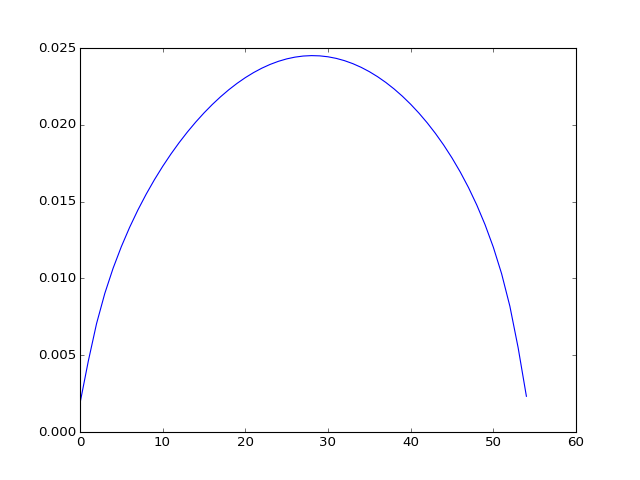

<IPython.core.display.Javascript object>


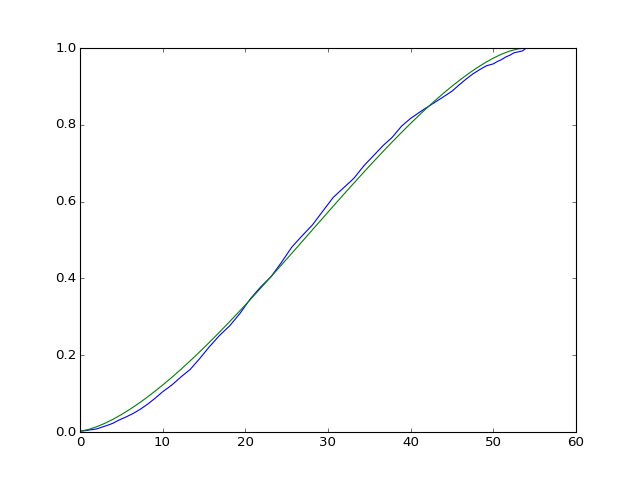

In [8]:
efficacies=np.linspace(-4.5,4.5,201)
distribution=scipy.stats.norm.pdf(efficacies,0,1.5)
distribution=distribution/distribution.sum()

N=54

c=-0.05
w=1.8

difficulties=np.linspace(c-w,c+w,N)
results=np.arange(0.,N+1)
probabilities_all=results*0

for efficacy,weight in zip(efficacies,distribution):
    probs=ProbCorrect(efficacy,difficulties)
    
    probabilities=results*0
    probabilities[0]=1
    for p in probs:
        probabilitiesaux1=probabilities*(1-p)
        probabilitiesaux2=np.roll(probabilities*p,1)
        probabilities=probabilitiesaux1+probabilitiesaux2
        
    probabilities_all+=probabilities*weight

plt.figure()
plt.plot(results,probabilities_all)

plt.figure()
plt.plot(xrawall*54,np.cumsum(prior))
plt.plot(results,np.cumsum(probabilities_all))

prior2=probabilities_all

<IPython.core.display.Javascript object>


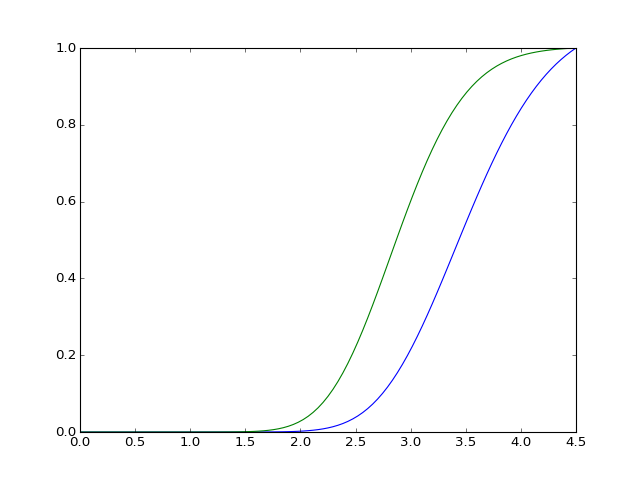

<IPython.core.display.Javascript object>


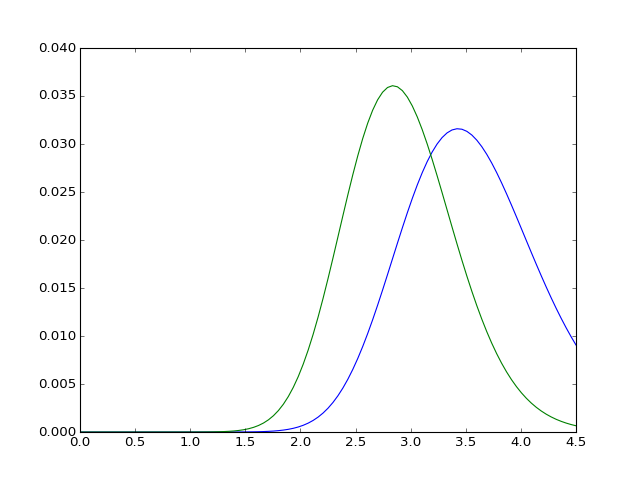

0.761966513114 0.219869153567 0.0181643333186
0.771048679774 0.228951320226
3.36774070143


In [9]:
def likelihood(score,efficacy):
    scoreraw=reverse([score])
    probs=ProbCorrect(efficacy,difficulties)
    
    probabilities=results*0
    probabilities[0]=1
    for p in probs:
        probabilitiesaux1=probabilities*(1-p)
        probabilitiesaux2=np.roll(probabilities*p,1)
        probabilities=probabilitiesaux1+probabilitiesaux2    
    return probabilities[int(scoreraw)]

posterioralice=distribution*0
posteriorbob=distribution*0

for i,efficacy in enumerate(efficacies):
    posterioralice[i]=distribution[i]*likelihood(780,efficacy)
    posteriorbob[i]=distribution[i]*likelihood(740,efficacy)

posterioralice=posterioralice/posterioralice.sum()
posteriorbob=posteriorbob/posteriorbob.sum()
plt.figure()
plt.plot(efficacies,np.cumsum(posterioralice))
plt.plot(efficacies,np.cumsum(posteriorbob))
plt.xlim(0,4.5)

plt.figure()
plt.plot(efficacies,posterioralice)
plt.plot(efficacies,posteriorbob)
plt.xlim(0,4.5)


probA=0
probB=0
probE=0
for i in range(len(efficacies)):
    for j in range(len(efficacies)):
        if efficacies[i]>efficacies[j]:
            probA+=posterioralice[i]*posteriorbob[j]
        elif efficacies[i]<efficacies[j]:
            probB+=posterioralice[i]*posteriorbob[j]
        else:
            probE+=posterioralice[i]*posteriorbob[j]

print probA,probB,probE
print probA+probE/2,probB+probE/2

print (probA+probE/2)/(probB+probE/2)